# __3.1. Classification__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets 
from ipywidgets import interact, interact_manual
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import load_iris

@interact

def plot_reg(featurex =  (0,3,1), featurey = (0,3,1), d = (-8,10,1),c =(-8,10,1)):
  iris = load_iris()
  features = iris.data.T

  plt.xlabel(iris.feature_names[featurex])
  plt.ylabel(iris.feature_names[featurey])
  plt.scatter(features[featurex][50:], features[featurey][50:], alpha=0.4,
              s=100, c=iris.target[50:], cmap='seismic')


  features[featurex] = c*features[featurex]**d + c*features[featurex]**(d-1)
  features[featurey] = c*features[featurey]**d + c*features[featurey]**(d-1)
  # plt.legend(iris.target_names)
  plt.figure()
  plt.scatter(features[featurex][50:], features[featurey][50:], alpha=0.4,
              s=100, c=iris.target[50:], cmap='seismic')
  plt.xlabel(iris.feature_names[featurex])
  plt.ylabel(iris.feature_names[featurey])
  # plt.legend(iris.target_names)

interactive(children=(IntSlider(value=1, description='featurex', max=3), IntSlider(value=1, description='featu…

# __Task 1__

In [5]:
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_data['target'] = iris.target
iris_data
X = iris_data.iloc[:,0:4]
labels = iris_data.iloc[:,4]
y = np.where(labels == 0,1,-1)
d = 2
c = 1
X.iloc[:,:] = c*X.iloc[:,:]**(d-1)+c*X.iloc[:,:]**d # transformation
#X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1) # add a column of ones for the threshold
X = np.array(X)
X

array([[31.11, 15.75,  3.36,  0.24],
       [28.91, 12.  ,  3.36,  0.24],
       [26.79, 13.44,  2.99,  0.24],
       [25.76, 12.71,  3.75,  0.24],
       [30.  , 16.56,  3.36,  0.24],
       [34.56, 19.11,  4.59,  0.56],
       [25.76, 14.96,  3.36,  0.39],
       [30.  , 14.96,  3.75,  0.24],
       [23.76, 11.31,  3.36,  0.24],
       [28.91, 12.71,  3.75,  0.11],
       [34.56, 17.39,  3.75,  0.24],
       [27.84, 14.96,  4.16,  0.24],
       [27.84, 12.  ,  3.36,  0.11],
       [22.79, 12.  ,  2.31,  0.11],
       [39.44, 20.  ,  2.64,  0.24],
       [38.19, 23.76,  3.75,  0.56],
       [34.56, 19.11,  2.99,  0.56],
       [31.11, 15.75,  3.36,  0.39],
       [38.19, 18.24,  4.59,  0.39],
       [31.11, 18.24,  3.75,  0.39],
       [34.56, 14.96,  4.59,  0.24],
       [31.11, 17.39,  3.75,  0.56],
       [25.76, 16.56,  2.  ,  0.24],
       [31.11, 14.19,  4.59,  0.75],
       [27.84, 14.96,  5.51,  0.24],
       [30.  , 12.  ,  4.16,  0.24],
       [30.  , 14.96,  4.16,  0.56],
 

In [ ]:
def predict(W, X):
        """ Return class label after each setp """
        return np.where(net_input(W, X) >= 0.0, 1, -1)   

def net_input(W, X):
        """ Calculate net input """
        return np.dot(X, W[1:]) + 1*W[0]

def plot_errors(error):
    plt.plot(range(0, len(error) + 0), error,marker='o') #0,len+1 if PLA
    plt.xlabel('Iterations')
    plt.ylabel('Number of misclassifications')
    plt.show()   

def train(n_iter, X, y): # PLA
        W = np.zeros(1 + X.shape[1])
        errors_ = []        
        for i in range(n_iter):
            for j, (xi, target) in enumerate(zip(X,y)):
                update = target - predict(W, xi)
                W[1:] += update*xi
                W[0] += update
            # errors on whole dataset 
            errors = 0
            for j, (xi, target) in enumerate(zip(X, y)):
                if predict(W, xi) != target:
                    errors += 1
            # -------------------------------------------
            errors_.append(errors) 
            i += 1
            print ("Iteration: ", i)
            print("Weights: ", W)
            
        plot_errors(errors_)
        return W

def fit(n_iter, X, y,): # Pocket Algorithm
        W = np.zeros(1 + X.shape[1])
        errors_ = []        
        min_error = 10000
        W_opt = np.zeros(1 + X.shape[1])
        Best_itr = 0

        for i in range(n_iter):
            
            # errors on whole dataset 
            errors = 0
            for j, (xi, target) in enumerate(zip(X, y)):
                if predict(W, xi) != target:
                    errors += 1
            # -------------------------------------------
            errors_.append(errors) 

            if errors < min_error: 
              min_error = errors
              W_opt = np.copy(W) 
              Best_itr = i

            for j, (xi, target) in enumerate(zip(X,y)):
                update = target - predict(W, xi)
                W[1:] += update*xi
                W[0] += update

            i += 1
            print ("Iteration: ", i)
            print("Weights: ", W)
        plot_errors(errors_)
        print('Mininum misclassificaton error is:',min_error)
        print('W:',W_opt,'iteration:',Best_itr)
        return W_opt

def sigmoid(z):
    return 1/(1+np.exp(-z))


Iteration:  1
Weights:  [  -2.   -112.    -26.88  -53.58   -6.72]
Iteration:  2
Weights:  [  0.   -54.18  11.12 -64.14 -10.38]
Iteration:  3
Weights:  [  2.     8.04  42.62 -57.42  -9.9 ]
Iteration:  4
Weights:  [  2.     8.04  42.62 -57.42  -9.9 ]
Iteration:  5
Weights:  [  2.     8.04  42.62 -57.42  -9.9 ]
Iteration:  6
Weights:  [  2.     8.04  42.62 -57.42  -9.9 ]
Iteration:  7
Weights:  [  2.     8.04  42.62 -57.42  -9.9 ]
Iteration:  8
Weights:  [  2.     8.04  42.62 -57.42  -9.9 ]
Iteration:  9
Weights:  [  2.     8.04  42.62 -57.42  -9.9 ]
Iteration:  10
Weights:  [  2.     8.04  42.62 -57.42  -9.9 ]


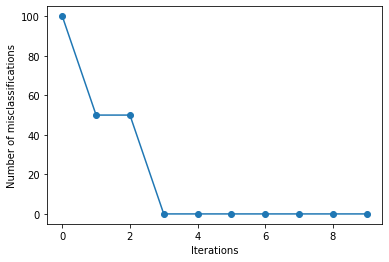

Mininum misclassificaton error is: 0
W: [  2.     8.04  42.62 -57.42  -9.9 ] iteration: 3


In [ ]:
# train classifier 1 (Sesota vs others)
n_iter = 10
W_final1 = fit(n_iter,X,y)


Iteration:  1
Weights:  [ -2.   -42.2  -33.   -37.14 -11.26]
Iteration:  2
Weights:  [ -2.   -22.18 -34.5  -67.56 -22.04]
Iteration:  3
Weights:  [ -2.    -2.16 -36.   -97.98 -32.82]
Iteration:  4
Weights:  [  -2.     17.86  -37.5  -128.4   -43.6 ]
Iteration:  5
Weights:  [  -2.     37.88  -39.   -158.82  -54.38]
Iteration:  6
Weights:  [  -2.     72.06  -50.72 -146.46  -59.66]
Iteration:  7
Weights:  [  -4.     29.86  -83.72 -183.6   -70.92]
Iteration:  8
Weights:  [  -4.     62.98  -76.82 -192.24  -75.22]
Iteration:  9
Weights:  [  -4.     97.16  -88.54 -179.88  -80.5 ]
Iteration:  10
Weights:  [  -6.     68.06 -113.14 -195.24  -85.28]
Iteration:  11
Weights:  [  -6.    111.3  -119.26 -182.14  -89.04]
Iteration:  12
Weights:  [  -8.     82.2  -143.86 -197.5   -93.82]
Iteration:  13
Weights:  [  -8.    125.44 -149.98 -184.4   -97.58]
Iteration:  14
Weights:  [ -10.     96.34 -174.58 -199.76 -102.36]
Iteration:  15
Weights:  [ -10.    139.58 -180.7  -186.66 -106.12]
Iteration:  16
Weig

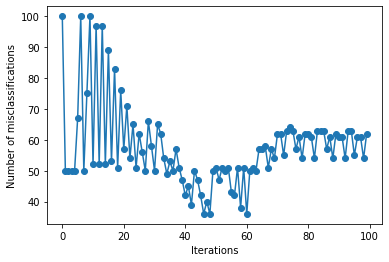

Mininum misclassificaton error is: 36
W: [ -48.    285.64 -539.58 -252.5  -271.16] iteration: 46


In [ ]:
# train classifier 2 (Versicolor vs Others)
y2 = np.where(labels == 1,1,-1)
W_final2 = fit(100,X,y2)

Iteration:  1
Weights:  [ 0.   29.76 -3.12 77.28 17.02]
Iteration:  2
Weights:  [ -2.   -11.98 -21.42 114.56  28.06]
Iteration:  3
Weights:  [ -2.   -32.   -19.92 144.98  38.84]
Iteration:  4
Weights:  [ -2.   -52.02 -18.42 175.4   49.62]
Iteration:  5
Weights:  [ -2.   -72.04 -16.92 205.82  60.4 ]
Iteration:  6
Weights:  [ -2.   -92.06 -15.42 236.24  71.18]
Iteration:  7
Weights:  [  -2.   -112.08  -13.92  266.66   81.96]
Iteration:  8
Weights:  [  -2.   -132.1   -12.42  297.08   92.74]
Iteration:  9
Weights:  [  -2.   -152.12  -10.92  327.5   103.52]
Iteration:  10
Weights:  [  -2.   -172.14   -9.42  357.92  114.3 ]
Iteration:  11
Weights:  [  -2.   -205.26  -16.32  366.56  118.6 ]
Iteration:  12
Weights:  [  -2.   -197.88  -11.52  388.78  123.64]
Iteration:  13
Weights:  [  -2.   -213.72  -18.42  401.5   127.16]
Iteration:  14
Weights:  [  -2.   -229.56  -25.32  414.22  130.68]
Iteration:  15
Weights:  [  -2.   -186.04  -16.5   455.64  137.72]
Iteration:  16
Weights:  [  -2.   -192.

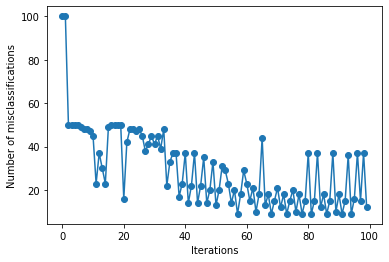

Mininum misclassificaton error is: 9
W: [ -20.   -550.18 -231.12  969.5   404.64] iteration: 57


In [ ]:
# train classifier 3 (Verginica vs Others)
y3 = np.where(labels == 2,1,-1)
W_final3 = fit(100,X,y3)

In [ ]:
# Classifier 1 has no error so OK
# Get the indexes for misclassified points : Classifier 2 
misclassified2 = np.array(np.where(y2 != predict(W_final2,X))).reshape(36,)
print(misclassified2)

# Get 5 false positive and 5 negative 
FP2 = []
FN2 = []

for i in misclassified2:
    if (predict(W_final2,X[i,:]) != y2[i])  and (y2[i] == -1) : FP2.append(i)
    if (predict(W_final2,X[i,:]) != y2[i])  and (y2[i] == 1) : FN2.append(i)
print('False Positive indexes:',FP2)
print('False Negative indexes:',FN2,'\n')
FP2 = FP2[:5]
FN2 = FN2[:5]
print('False Positive indexes (5 taken):',FP2)
print('False Negative indexes (5 taken):',FN2,'\n')

X_original = iris_data.iloc[:,0:4]
X_original = np.array(X_original)
print('5 False positive data (features) :')
for i in FP2:
    print(X_original[i,:])
print('\n')
print('5 False negative data (features) :')
for i in FN2:
    print(X_original[i,:])
#print('predict:',predict(W_final2,X[59,:]))

[ 1  9 12 20 25 28 31 34 35 36 41 45 51 55 56 57 59 61 63 64 66 70 73 77
 78 83 84 85 88 89 90 91 94 95 96 99]
False Positive indexes: [1, 9, 12, 20, 25, 28, 31, 34, 35, 36, 41, 45]
False Negative indexes: [51, 55, 56, 57, 59, 61, 63, 64, 66, 70, 73, 77, 78, 83, 84, 85, 88, 89, 90, 91, 94, 95, 96, 99] 

False Positive indexes (5 taken): [1, 9, 12, 20, 25]
False Negative indexes (5 taken): [51, 55, 56, 57, 59] 

5 False positive data (features) :
[4.9 3.  1.4 0.2]
[4.9 3.1 1.5 0.1]
[4.8 3.  1.4 0.1]
[5.4 3.4 1.7 0.2]
[5.  3.  1.6 0.2]


5 False negative data (features) :
[6.4 3.2 4.5 1.5]
[5.7 2.8 4.5 1.3]
[6.3 3.3 4.7 1.6]
[4.9 2.4 3.3 1. ]
[5.2 2.7 3.9 1.4]


In [ ]:
# Get the indexes for misclassified points : Classifier 3
misclassified3 = np.array(np.where(y3 != predict(W_final3,X))).reshape(9,)
print(misclassified3)
# Get 5 false positive and 5 negative 
FP3 = []
FN3 = []
for i in misclassified3:
    if (predict(W_final3,X[i,:]) != y3[i])  and (y3[i] == -1) : FP3.append(i)
    if (predict(W_final3,X[i,:]) != y3[i])  and (y3[i] == 1) : FN3.append(i)
print('False Positive indexes:',FP3)
print('False Negative indexes:',FN3,'\n')

print('There is no false negative data')
print('5 False positive data (features) :')
for i in FP3:
    print(X_original[i,:])

#print('predict:',predict(W_final3,X[70,:]))

[55 63 66 70 72 73 83 84 90]
False Positive indexes: [55, 63, 66, 70, 72, 73, 83, 84, 90]
False Negative indexes: [] 

There is no false negative data
5 False positive data (features) :
[5.7 2.8 4.5 1.3]
[6.1 2.9 4.7 1.4]
[5.6 3.  4.5 1.5]
[5.9 3.2 4.8 1.8]
[6.3 2.5 4.9 1.5]
[6.1 2.8 4.7 1.2]
[6.  2.7 5.1 1.6]
[5.4 3.  4.5 1.5]
[5.5 2.6 4.4 1.2]


In [ ]:
# test classifier 1
print('classifier 1 test')
print(net_input(W_final1,X[49,:]),'predict:',predict(W_final1,X[49,:]))
print(net_input(W_final1,X[60,:]),'predict:',predict(W_final1,X[60,:]))
print(net_input(W_final1,X[110,:]),'predict:',predict(W_final1,X[110,:]))
print('\n')
# test classifier 2
print('classifier 2 test')
print(net_input(W_final2,X[49,:]),'predict:',predict(W_final2,X[49,:]))
print(net_input(W_final2,X[60,:]),'predict:',predict(W_final2,X[60,:]))
print(net_input(W_final2,X[110,:]),'predict:',predict(W_final2,X[110,:]))
print('\n')
# test classifier 3
print('classifier 3 test')
print(net_input(W_final3,X[49,:]),'predict:',predict(W_final3,X[49,:]))
print(net_input(W_final3,X[60,:]),'predict:',predict(W_final3,X[60,:]))
print(net_input(W_final3,X[110,:]),'predict:',predict(W_final3,X[110,:]))

classifier 1 test
652.6706 predict: 1
-425.24500000000006 predict: -1
-878.9734 predict: -1


classifier 2 test
-48.91859999998131 predict: -1
764.5250000000265 predict: 1
-2857.2401999999556 predict: -1


classifier 3 test
-16450.359199999988 predict: -1
-1833.2149999999838 predict: -1
2641.4572000000335 predict: 1


In [ ]:
def classify(W_final1,W_final2,W_final3,X):

    res = np.array([0,0,0])
    res[0] = net_input(W_final1,X)
    res[1] = net_input(W_final2,X)
    res[2] = net_input(W_final3,X)
    index = np.argmax(res) # find the index of the maximum value of the 3 classifiers

    if index == 0:
      print('Setosa')
    if index == 1:
      print('Versicolor')
    if index == 2:
      print('Verginica')

In [ ]:

classify(W_final1,W_final2,W_final3,X[60,:])

Versicolor


# __Task 2__: k-Fold Cross-Validation

# __3.2. Regression__

In [6]:
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
@interact

def plot_reg(featurex = (0,12,1),d_x = (-8,10,1),c_x_0 =(-8,10,0.1),c_x_1 =(-8,10,0.1),c_x_2 =(-8,10,0.1),bias =(-20,40,1)):
  boston = load_boston()
  features = boston.data.T
  ofeatures = features.copy()

  features[featurex] = c_x_0*features[featurex]**d_x + c_x_1*features[featurex]**(d_x-1)+c_x_2*features[featurex]**(d_x-2)+bias

  Z=features[featurex:(featurex+1)]
  ZT=np.transpose(Z)
  X_train, X_test, y_train, y_test = train_test_split(ZT, boston.target, test_size=0.2, random_state=0)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_tr_pred = lr.predict(X_train)
  y_te_pred = lr.predict(X_test)

  plt.figure(figsize = (15,5))
  plt.scatter(X_train, y_train, alpha=0.4,s=100, c='blue')
  #w = lr.coef_
  #b=lr.intercept_
  #plt.scatter(X_train, b+w*X_train,  alpha=0.4,s=100, c='red')
  plt.scatter(X_train, y_tr_pred,  alpha=0.4,s=100,c='green')
  plt.scatter(X_test, y_te_pred,  alpha=0.4,s=100,c='red')
  plt.xlabel(boston.feature_names[featurex])
  plt.ylabel('MEDV') 
  df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_te_pred.flatten()})
  print(df)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_te_pred))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_te_pred))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_te_pred)))

interactive(children=(IntSlider(value=6, description='featurex', max=12), IntSlider(value=1, description='d_x'…

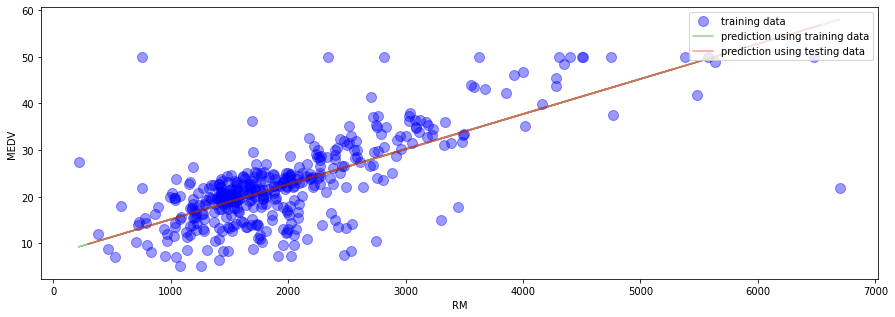

In [ ]:
boston = load_boston()
boston_data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_data['MEDV'] = boston.target
boston_data
feature_choice = 5
X = boston_data.iloc[:,feature_choice] # 12 corresponds to the LSTAT feature
X_original = X.copy() # get the copy of the original data before transformation
c_x_0 = 1
c_x_1 = 1
c_x_2 = 1
d_x = 4
bias = 0
X.iloc[:] = c_x_0*X.iloc[:]**d_x + c_x_1*X.iloc[:]**(d_x-1)+c_x_2*X.iloc[:]**(d_x-2)+bias # tranform into non-linear space
X = np.array(X).reshape(len(X),1)

X_train, X_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.2, random_state=0) # split the data into training and testing data

lr = LinearRegression()
lr.fit(X_train, y_train)
y_tr_pred = lr.predict(X_train)
y_te_pred = lr.predict(X_test)

plt.figure(figsize = (15,5))
plt.scatter(X_train, y_train, alpha=0.4,s=100, c='blue',label='training data')
plt.xlabel(boston.feature_names[feature_choice])
plt.ylabel('MEDV') 
plt.plot(X_train, y_tr_pred,  alpha=0.4,c='green',label='prediction using training data')
plt.plot(X_test, y_te_pred,  alpha=0.4,c='red',label='prediction using testing data')
plt.legend(loc='upper right')


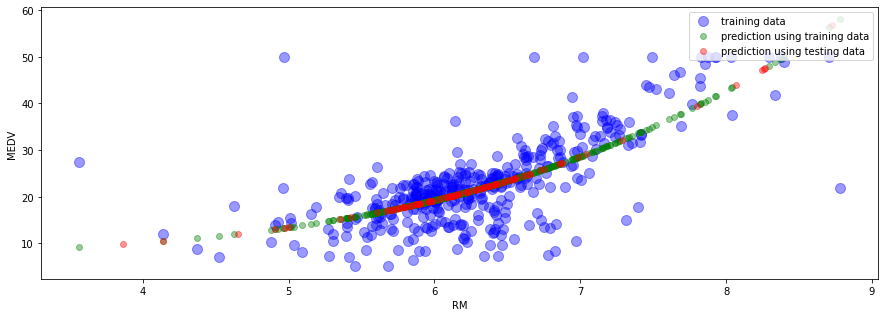

In [ ]:
boston = load_boston()
boston_data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_data['MEDV'] = boston.target
boston_data
feature_choice = 5
X = boston_data.iloc[:,feature_choice] # 12 corresponds to the LSTAT feature

c_x_0 = 1
c_x_1 = 1
c_x_2 = 1
d_x = 4
bias = 1

X_train, X_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.2, random_state=0) # split the data into training and testing data
X_originaltr = X_train.copy() # get the copy of the original data before transformation
X_originalte = X_test.copy()

X_train.iloc[:] = c_x_0*X_train.iloc[:]**d_x + c_x_1*X_train.iloc[:]**(d_x-1)+c_x_2*X_train.iloc[:]**(d_x-2)+bias # tranform into non-linear space
X_test.iloc[:] = c_x_0*X_test.iloc[:]**d_x + c_x_1*X_test.iloc[:]**(d_x-1)+c_x_2*X_test.iloc[:]**(d_x-2)+bias # tranform into non-linear space
X_train = np.array(X_train).reshape(len(X_train),1) # boston.target already numpy(idk why..) so no need to reshape before using LinearRegression
X_test = np.array(X_test).reshape(len(X_test),1) 
#X_originaltr = np.array(X_originaltr).reshape(len(X_originaltr),1)
#X_originalte = np.array(X_originalte).reshape(len(X_originalte),1)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_tr_pred = lr.predict(X_train)
y_te_pred = lr.predict(X_test)

plt.figure(figsize = (15,5))
plt.scatter(X_originaltr, y_train, alpha=0.4,s=100, c='blue',label='training data')
plt.xlabel(boston.feature_names[feature_choice])
plt.ylabel('MEDV') 
plt.scatter(X_originaltr, y_tr_pred,  alpha=0.4,c='green',label='prediction using training data')
plt.scatter(X_originalte, y_te_pred,  alpha=0.4,c='red',label='prediction using testing data')
plt.legend(loc='upper right')


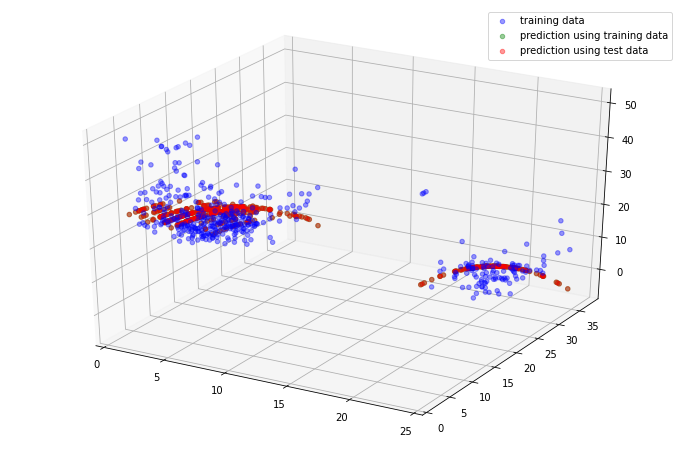

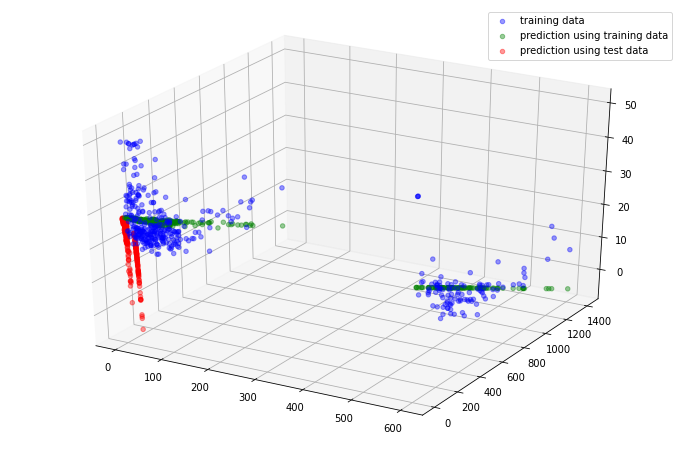

In [9]:
boston = load_boston()
boston_data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_data['MEDV'] = boston.target
X = boston_data.iloc[:,[8,12]]
y = boston_data.iloc[:,13]

c_x_0 = 1
c_x_1 = 1
c_x_2 = 1
d_x = 2
bias = 0

X_train, X_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.2, random_state=0) # split data
X_originaltr = X_train.copy() # get the copy of the original data before transformation
X_originalte = X_test.copy()
X_train.iloc[:,:] = c_x_0*X_train.iloc[:,:]**d_x + c_x_1*X_train.iloc[:,:]**(d_x-1)+c_x_2*X_train.iloc[:,:]**(d_x-2)+bias # tranform into non-linear space
X_test.iloc[:,:] = c_x_0*X_test.iloc[:,:]**d_x + c_x_1*X_test.iloc[:,:]**(d_x-1)+c_x_2*X_test.iloc[:,:]**(d_x-2)+bias # tranform into non-linear space

# train and predict
lr = LinearRegression()
lr.fit(X_train, y_train)
y_tr_pred = lr.predict(X_train)
y_te_pred = lr.predict(X_test)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_originaltr.iloc[:,0],X_originaltr.iloc[:,1],y_train,alpha=0.4,c='b',label='training data')
#ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1],y_train,alpha=0.4,c='r',label='training data in non linear space')
ax.scatter(X_originaltr.iloc[:,0],X_originaltr.iloc[:,1],y_tr_pred,alpha=0.4,c='green',label='prediction using training data')
ax.scatter(X_originaltr.iloc[:,0],X_originaltr.iloc[:,1],y_tr_pred,alpha=0.4,c='red',label='prediction using test data')
ax.legend(loc='upper right')
plt.show()
#print(X_originaltr)
#print(X_train)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1],y_train,alpha=0.4,c='b',label='training data')
#ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1],y_train,alpha=0.4,c='r',label='training data in non linear space')
ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1],y_tr_pred,alpha=0.4,c='green',label='prediction using training data')
ax.scatter(X_originaltr.iloc[:,0],X_originaltr.iloc[:,1],y_tr_pred,alpha=0.4,c='red',label='prediction using test data')
ax.legend(loc='upper right')
plt.show()

In [ ]:
boston = load_boston()
boston_data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_data['MEDV'] = boston.target
X = boston_data.iloc[:,0:13]
y = boston_data.iloc[:,13]

c_x_0 = 10
c_x_1 = 5
c_x_2 = -1
d_x = 2
bias = 0

X_train, X_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.2, random_state=0) # split data
X_originaltr = X_train.copy() # get the copy of the original data before transformation
X_originalte = X_test.copy()
X_train.iloc[:,:] = c_x_0*X_train.iloc[:,:]**d_x + c_x_1*X_train.iloc[:,:]**(d_x-1)+c_x_2*X_train.iloc[:,:]**(d_x-2)+bias # tranform into non-linear space
X_test.iloc[:,:] = c_x_0*X_test.iloc[:,:]**d_x + c_x_1*X_test.iloc[:,:]**(d_x-1)+c_x_2*X_test.iloc[:,:]**(d_x-2)+bias # tranform into non-linear space

# train and predict
lr = LinearRegression()
lr.fit(X_train, y_train)
y_tr_pred = lr.predict(X_train)
y_te_pred = lr.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_te_pred.flatten()})
print(df)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_te_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_te_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_te_pred)))

     Actual  Predicted
0      22.6  25.238559
1      50.0  20.431572
2      23.0  29.343746
3       8.3  12.585221
4      21.2  23.076030
..      ...        ...
97     24.7  26.078307
98     14.1  15.987984
99     18.7  17.854282
100    28.1  25.700973
101    19.8  21.370794

[102 rows x 2 columns]
Mean Absolute Error: 3.985745868486469
Mean Squared Error: 38.04749345182739
Root Mean Squared Error: 6.168265027690314
